# **Modul 3 Data Mining 2020 "Regression"**

## **Simple Linear Regression**

Dalam modul ini, kita belajar cara menggunakan scikit-learn untuk menerapkan **regresi linier sederhana**. Pertama unduh dataset yang terkait dengan konsumsi bahan bakar dan emisi karbon dioksida mobil. Kemudian, kita membagi data tersebut menjadi training dan test set, membuat model menggunakan training set, Mengevaluasi model Anda menggunakan test set, dan terakhir menggunakan model untuk memprediksi nilai yang belum diketahui

### **Importing Needed packages**

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### **Downloading Data**
Untuk mendownload dataset, kita akan menggunakan `!wget` untuk mendownloadnya dari IBM Object Storage.

In [0]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-02-10 16:01:06--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2020-02-10 16:01:06 (1.59 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



### **Data Understanding**

### `FuelConsumption.csv`:

Unduh dataset konsumsi bahan bakar, **`FuelConsumption.csv`**, yang berisi peringkat konsumsi bahan bakar spesifik-model dan estimasi emisi karbon dioksida untuk kendaraan ringan baru,untuk penjualan eceran di Kanada. [Link dataset](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


### **Load the data in dataframe**

In [0]:
df = pd.read_csv("FuelConsumption.csv")
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### **Data Exploration**

Pertama mari kita eksplorasi deskriptif pada data yang kita miliki.

In [0]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Pilih beberapa fitur atau kolom untuk mengeksplor lebih lanjut.

In [0]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


Agar lebih memudahkan kita mengerti tentang data kita, maka kita dapat membuat plot sederhana untuk mempermudahnya.

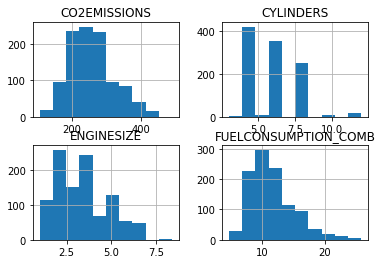

In [0]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Sekarang, mari kita plot masing-masing fitur ini dengan fitur Emisi, untuk melihat seberapa linier hubungan mereka:

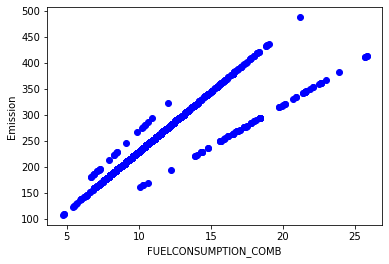

In [0]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

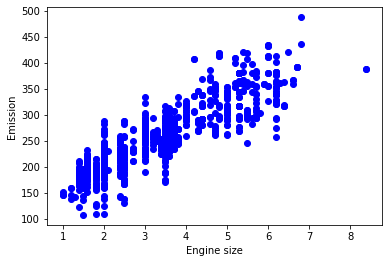

In [0]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

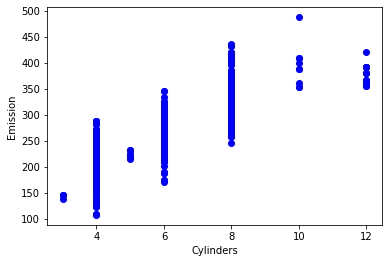

In [0]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()


### **Creating train and test dataset**


Train / Test Split melibatkan pemisahan dataset ke dalam set pelatihan dan pengujian masing-masing, yang saling eksklusif. Setelah ini, Anda berlatih dengan perangkat pelatihan dan menguji dengan perangkat uji.
Hal ini akan memberikan evaluasi yang lebih akurat dari akurasi *out-of-sample* karena dataset pengujian bukan bagian dari dataset yang telah digunakan untuk melatih data. Itu lebih realistis untuk masalah dunia nyata.

Ini berarti bahwa kita mengetahui hasil dari setiap titik data dalam dataset ini, membuatnya menjadi sangat bagus untuk diuji! Dan karena data ini belum digunakan untuk melatih model, model tidak memiliki pengetahuan tentang hasil dari titik data ini. Jadi, pada dasarnya, ini benar-benar pengujian di luar sampel.

In [0]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
print(msk)

[ True  True False ... False  True  True]


### **Simple Regression Model**
Regresi Linier cocok dengan model linier dengan koefisien B = (B1, ..., Bn) untuk meminimalkan 'jumlah kuadrat kuadrat' antara x independen dalam dataset, dan ketergantungan y oleh pendekatan linier.

Sebelum masuk pada proses regresi anda disarankan untuk melakukan data preparation seperti pada modul sebelumnya (minimal). Kemudian anda layaknya mengerti sebaran data yang anda miliki. Anda dapat menggunakan metode plotting dataset dari fitur-fitur yang saling berkaitan, melakukan data summarization, dan data exploration lainnya.

### **Train data distribution**

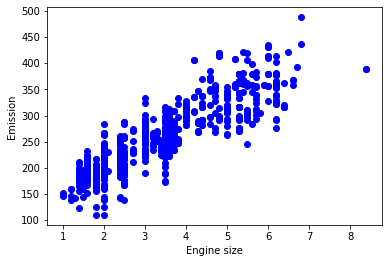

In [0]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### **Modeling**

Menggunakan paket sklearn untuk memodelkan data.

In [0]:
from sklearn import linear_model

# menggunakan method LinearRegression() untuk algoritma regresi linear
regr = linear_model.LinearRegression()

# definisi variabel independen x dan variabel dependen y
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

# fit data train
regr.fit (train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.54181983]]
Intercept:  [125.07156532]


Seperti disebutkan sebelumnya, **Coefficient** dan **Intercept** dalam regresi linier sederhana, adalah parameter dari garis fit. Mengingat bahwa ini adalah regresi linier sederhana, dengan hanya 2 parameter, dan mengetahui bahwa parameter adalah intersep dan kemiringan garis, sklearn dapat memperkirakannya langsung dari data kita. Perhatikan bahwa semua data harus tersedia untuk melintasi dan menghitung parameter.

### **Plot outputs**

Mari kita plot hasil fit line nya diatas data yang kita miliki:

Text(0, 0.5, 'Emission')

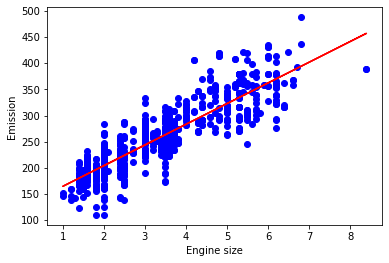

In [0]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

### **Evaluation**


Disini kita akan membandingkan nilai aktual dan nilai prediksi untuk menghitung akurasi model regresi. Metrik evaluasi memberikan peran kunci dalam pengembangan model, karena memberikan wawasan tentang bidang-bidang yang membutuhkan perbaikan.

Ada metrik evaluasi model yang berbeda, mari gunakan MSE di sini untuk menghitung akurasi model kita berdasarkan pada set tes:

* Mean absolute error: Ini adalah rata-rata dari nilai absolut kesalahan. Ini adalah metrik termudah untuk dipahami karena itu hanya kesalahan rata-rata.

* Mean Squared Error (MSE): Mean Squared Error (MSE) adalah rata-rata dari kesalahan kuadrat. Ini lebih populer daripada kesalahan absolut rata-rata karena fokus lebih diarahkan pada kesalahan besar. Ini karena istilah kuadrat secara eksponensial meningkatkan kesalahan yang lebih besar dibandingkan dengan yang lebih kecil.

* Root Mean Squared Error (RMSE).

* R-squared bukan kesalahan, tetapi merupakan metrik populer untuk akurasi model Anda. Ini menunjukkan seberapa dekat data dengan garis regresi yang sesuai. Semakin tinggi R-squared, semakin baik model sesuai dengan data Anda. Skor terbaik yang mungkin adalah 1.0 dan bisa negatif (karena modelnya bisa lebih buruk secara sewenang-wenang).

*ingat pelajaran statistik dan metode numerik di semester sebelumnya*

## **Non Linear Regression Analysis**

Jika data menunjukkan tren melengkung, maka regresi linier tidak akan menghasilkan hasil yang akurat bila dibandingkan dengan regresi non-linear karena, seperti namanya, regresi linier menganggap bahwa data tersebut memiliki distribusi linear. Mari kita belajar tentang regresi non-linear dan terapkan contoh pada kode python. Dalam sesi modul ini, kami memasukkan model non-linear ke titik data yang sesuai dengan PDB Tiongkok dari 1960 hingga 2014.

### **Importing required libraries**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Meskipun regresi linier sangat baik untuk menyelesaikan banyak masalah, itu tidak dapat digunakan untuk semua dataset. Pertama ingat bagaimana regresi linier, bisa memodelkan suatu dataset. Ini memodelkan hubungan linear antara variabel dependen y dan variabel independen x. Itu persamaan sederhana, derajat 1, misalnya y = 2x + 3.

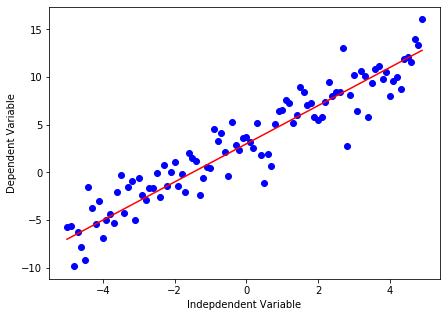

In [0]:
x = np.arange(-5.0, 5.0, 0.1)

# Anda dapat menyesuaikan kemiringan & intercept untuk memverifikasi perubahan pada grafik
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.figure(figsize=(7,5))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Regresi non-linear adalah hubungan antara variabel independen $ x $ dan variabel dependen $ y $ yang menghasilkan data model fungsi yang non-linear. Pada dasarnya setiap hubungan yang tidak linier dapat disebut sebagai non-linear dan biasanya diwakili oleh polinomial $ k $ derajat (maximum power of $ x $).

$$ \ y = a x ^ 3 + b x ^ 2 + c x + d \ $$

Fungsi non-linear dapat memiliki elemen seperti eksponensial, logaritma, fraksi, dan lainnya. Misalnya: $$ y = \ log (x) $$
    
Atau bahkan, lebih rumit seperti:
$$ y = \ log (a x ^ 3 + b x ^ 2 + c x + d) $$

Mari kita lihat grafik fungsi kubik.

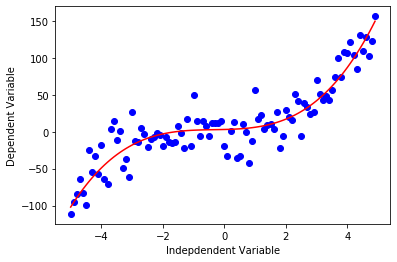

In [0]:
x = np.arange(-5.0, 5.0, 0.1)

## Anda dapat menyesuaikan kemiringan & intercept untuk memverifikasi perubahan pada grafik
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Seperti yang Anda lihat, fungsi ini memiliki $ x ^ 3 $ dan $ x ^ 2 $ sebagai variabel independen. Selain itu, grafik fungsi ini bukan garis lurus di atas bidang 2D. Jadi ini adalah fungsi non-linear.

Beberapa jenis fungsi non-linier lainnya adalah:

### **Quadratic**

$$ Y = X^2 $$

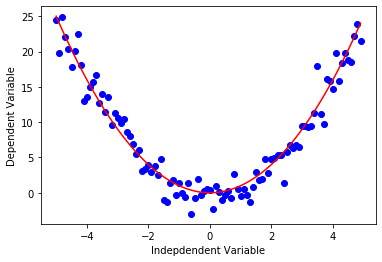

In [0]:
x = np.arange(-5.0, 5.0, 0.1)

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### **Exponential**

Fungsi eksponensial dengan basis c didefinisikan oleh 

$$ Y = a + b c ^ X $$ 

di mana 

$b ≠ 0, c> 0, c ≠ 1$, dan $x$ adalah bilangan real. Basis, c, adalah konstan dan eksponen, $x$, adalah variabel.

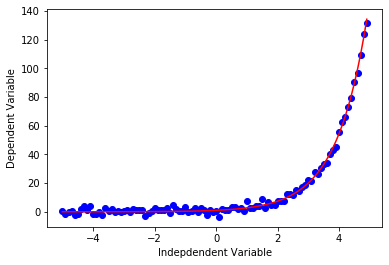

In [0]:
X = np.arange(-5.0, 5.0, 0.1)

y= np.exp(X)

y_noise = 2 * np.random.normal(size=x.size)

ydata = y + y_noise

plt.plot(X,ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### **Logarithmic**

Respons $ y $ adalah hasil dari penerapan peta logaritmik dari input $ x $ ke variabel output $ y $. Ini adalah salah satu bentuk paling sederhana dari **$log()$** : mis. 

$$ y = log (x) $$

Harap pertimbangkan bahwa alih-alih $ x $, kita dapat menggunakan $ X $, yang dapat berupa representasi polinomial dari $ x $. Dalam bentuk umum akan ditulis sebagai

$$ y = log (X) $$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


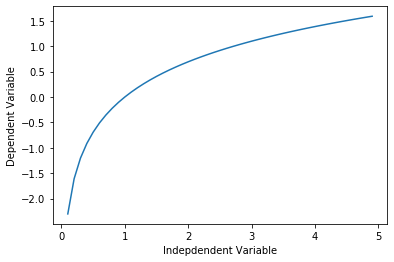

In [0]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### **Sigmoidal/Logistic**

$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

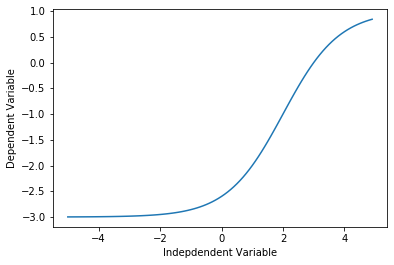

In [0]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

## **Non-Linear Regression example**

Sebagai contoh, kita akan mencoba dan menyesuaikan model non-linear dengan titik data yang sesuai dengan PDB Tiongkok dari tahun 1960 hingga 2014. Kami mengunduh kumpulan data dengan dua kolom, yang pertama, tahun antara tahun 1960 dan 2014, yang kedua, Pendapatan domestik bruto tahunan Tiongkok yang sesuai dalam dolar AS untuk tahun itu.

In [0]:
import numpy as np
import pandas as pd

#downloading dataset
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

2020-02-10 16:01:18 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


### **Plotting the Dataset**

Dibawah ini merupakan sebaran dari titik data. Ini semacam fungsi logistik atau eksponensial. Pertumbuhan dimulai lambat, kemudian dari 2005 ke depan, pertumbuhannya sangat signifikan. Dan akhirnya, itu sedikit berkurang pada tahun 2010-an.

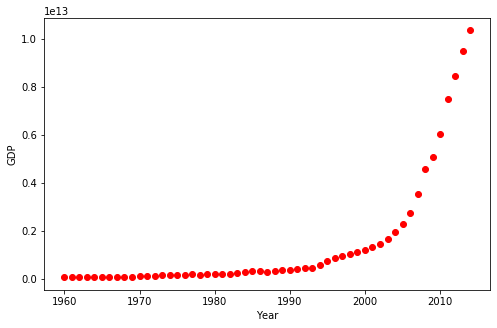

In [0]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### **Choosing a model** 

Dari tampilan awal pada plot, kami menentukan bahwa fungsi logistik bisa menjadi perkiraan yang baik,
karena memiliki sifat memulai dengan pertumbuhan yang lambat, meningkatkan pertumbuhan di tengah, dan kemudian menurun lagi di akhir; seperti yang diilustrasikan di bawah ini:

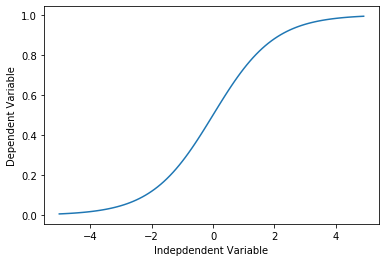

In [0]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

Rumus untuk fungsi logistik adalah sebagai berikut:

$$ \hat{Y} = \frac1{1 + e ^ {\beta_1 (X- \beta_2)}} $$

$ \beta_1 $: Mengontrol kecuraman kurva,

$ \beta_2 $: Menggeser kurva pada sumbu x.

### **Building The Model**

Sekarang, mari kita bangun model regresi kita dan inisialisasi parameternya.

In [0]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Mari kita lihat contoh sigmoid line yang mungkin cocok dengan data:

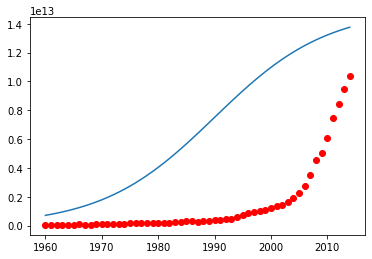

In [0]:
beta_1 = 0.10
beta_2 = 1990.0

# fungsi logistic 
Y_pred = sigmoid(x_data, beta_1 , beta_2)

# plot prediksi awal terhadap titik data
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

Tugas kita di sini adalah menemukan parameter terbaik untuk model kami. Mari kita menormalkan dulu x dan y kita:

In [0]:
# lakukan normalisasi data dahulu
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

#### How we find the best parameters for our fit line?

kita bisa menggunakan __curve_fit__ yang menggunakan kuadrat terkecil non-linear agar sesuai dengan fungsi sigmoid kita, untuk data. Nilai optimal untuk parameter sehingga jumlah residu kuadrat dari sigmoid (xdata, * popt) - ydata diminimalkan.

popt adalah parameter kami yang dioptimalkan.

In [0]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453017, beta_2 = 0.997207


Sekarang kita akan memplot model regresi yang dihasilkan.

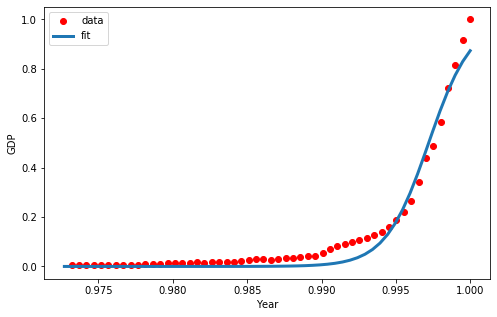

In [0]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## **Evaluate Model**

In [0]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.02
Residual sum of squares (MSE): 0.00
R2-score: 0.99
